In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from pandas import DataFrame
import pandas as pd
import scipy.stats as stat
%matplotlib inline
%config InlineBackend.figure_formats=['png']

In [2]:
matfn=u'matlab.mat'  
data=sio.loadmat(matfn)  

In [3]:
price = np.zeros(len(data['m']))
re = np.zeros(len(data['m'])-1)
for i in range(0,len(data['m'])):
    price[i] = data['m'][i][5]
re = np.diff(price)/price[0:len(data['m'])-1]

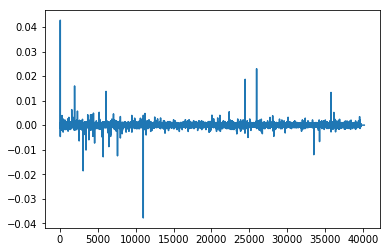

In [4]:
plt.plot(re)

In [5]:
def varcal(re):
    returns = pd.Series(re)
    mean = returns.mean()
    sigma = returns.std()
    tdf, tmean, tsigma = scipy.stats.t.fit(returns.as_matrix())
    return(returns.quantile(0.05))

In [6]:
varp = np.zeros(3980)
varr = np.zeros(3980)
for i in range(0,3980):
    varp[i] = varcal(price[i*10:i*10+299])
    varr[i] = varcal(re[i*10:i*10+299])

In [20]:
varprank = np.zeros(len(varp))
varrrank = np.zeros(len(varr))
for i in range(0,len(varp)):
    varprank[i] = stats.percentileofscore(varp, varp[i])
    varrrank[i] = stats.percentileofscore(varr, varr[i])

In [28]:
s1=pd.Series(varprank) #转为series类型
s2=pd.Series(varrrank)
s1.corr(s2)

0.41650376990622118

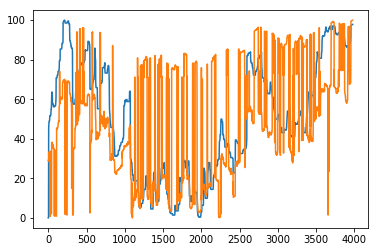

In [34]:
s1.plot()
s2.plot()

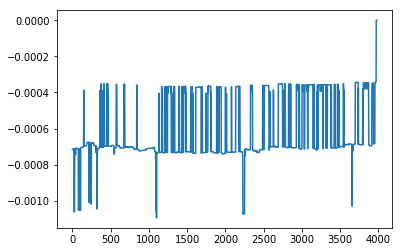

In [35]:
plt.plot(varr)